# Data-Driven Renovation Advice for Homeowners in King County
## Introduction

The project focuses on leveraging multiple linear regression modeling and additional statistical techniques to analyze historical sales data in King County, Northwestern County. The goal is to provide data-driven advice to homeowners on how home renovations can increase property values.

## Business Problem

Homeowners often lack accurate information on which renovations yield the best ROI. This project aims to fill that gap by offering strategic guidance based on data analysis, benefiting both homeowners and the real estate agency.

The primary business problem addressed in this project is the need for actionable insights regarding home renovations and their impact on the estimated value of properties in King County.

Our stakeholder Best Value real estate agency seeks to specialize in helping homeowners buy and sell homes in King County. Providing data-driven advice by understanding how different renovation features such as kitchen upgrades, bathroom remodels, or energy-efficient installations correlate with changes in home values, the agency can offer strategic guidance to clients.

## Objectives: 
1. Identify impactful renovation features by analyzing historical trends to determine the home renovation features that have the most impact on property values in King County.
2. Estimate ROI for different renovations based on market trends, location factors, and historical sales data. 
3. Analyze market trends and location factors by exploring how market trends and location-specific factors influence the effectiveness of home renovations in increasing property values.
4. Provide strategic recommendations to optimize property value through renovations based on your analysis.

## Methodology
1. Data Collection and Preprocessing: * Gather comprehensive historical sales data from King County real estate market. * Check for missing values and handle them appropriately (e.g., imputation, removal). * Encode categorical variables using techniques like one-hot encoding or label encoding. * Perform feature scaling or normalization as needed for numerical features.

2. Exploratory Data Analysis (EDA): * Explore the distribution of the target variable (price) and key numerical features using visualizations such as histograms, box plots, and scatter plots. * Analyze correlations between features using correlation matrices and heatmaps. * Identify outliers and anomalies in the data and decide on handling strategies.

3. Feature Engineering: * Create new features that may enhance model performance and interpretability (e.g., age of the house since built, total square footage). • Transform variables if necessary to meet assumptions of regression models (e.g., log transformation for skewed data). * Normalize or scale numerical features to ensure convergence and model stability. 

4. Model Building:
Split the dataset into training and testing sets to evaluate model performance.
Choose appropriate regression models such as multiple linear regression, ridge regression, or Lasso regression based on the nature of the problem and data.
Train initial models on the training data and evaluate them using metrics like mean squared error (MSE), R-squared, and cross-validation scores.
Consider regularization techniques to handle multicollinearity and overfitting issues.

**Model Evaluation and Refinement**:
Evaluate the initial model's performance on the testing data and compare against baseline models.
Refine models by tuning hyperparameters, selecting relevant features based on statistical significance and domain knowledge, and exploring ensemble methods if needed.
Use cross-validation techniques to ensure model robustness and generalization to unseen data.

**Presentation of Results**:
Prepare a comprehensive regression analysis report detailing model performance metrics, including MSE, R-squared, and feature importance.
Present insights from the analysis, including coefficients, significance levels, and interpretation of results.
Provide strategic recommendations to homeowners in King County based on ROI estimates for different renovation projects.
Visualize key findings using plots, charts, and tables to enhance understanding and communication with stakeholders.
##Data Collection and Preprocessing

First, we'll import the necessary libraries and load the dataset:

# Importing necessary libraries

In [41]:
# Import necessary libraries
import pandas as pd# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats 
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# load the dataset

In [42]:
#loading the dataset.This project uses the King County House Sales dataset.
df = pd.read_csv(r"C:\Users\Caro\Downloads\kc_house_data.csv")

# explore the dataset

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [44]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [45]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [46]:
df.shape

(21597, 21)

In [47]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# DATA CLEANING
1.Handling Missing Values

2.Correcting Data Types

3.Handling duplicates

4.Handling Outliers

5.Ensure consistency and accuracy across columns.

6.Display final dataset

# COPY

In [48]:
#Create a deep copy of the DataFrame
df_copy= df.copy(deep=True)
df_copy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [49]:
# Detect missing values. 
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Handling missing values

# 1. Imputtation
Missing values  are handled by imputing them with the mode for 'waterfront' and 'view' columns and with 0 for the 'yr_renovated' column. This is a reasonable approach,Imputing with the mode is suitable for categorical or ordinal variables where the mode represents the most frequent value. 

For numerical variables like 'yr_renovated', imputing with a specific value (in this case, 0) might be appropriate if missing values indicate that the renovation didn't occur. However, it's crucial to ensure that imputing with 0 doesn't introduce bias or distort the analysis.

We have an option to drop some of this ,but we still want to keep them in our analysis.

In [50]:
#handling the missing values
# Impute columns with mode
df['waterfront'].fillna(df['waterfront'].mode()[0], inplace=True)
df['view'].fillna(df['view'].mode()[0], inplace=True)

# Impute 'yr_renovated' column with 0
df['yr_renovated'].fillna(0, inplace=True)


In [51]:
#confirm if we still have missing values
df.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [52]:
#checking the datatypes of my columns
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# 2. Data Types Conversions

In [53]:
# Changing the data type from float to integer. 
df['bathrooms'] = df['bathrooms'].astype('int64')
df['floors'] = df['floors'].astype('int64')
df['bedrooms'] = df['bedrooms'].astype('int64')

# check the resulting dataframes
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1,1180,5650,1,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2,2570,7242,2,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1,770,10000,1,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3,1960,5000,1,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2,1680,8080,1,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Label encoding


Label encoding is suitable for ordinal categorical variables, where there is a meaningful order or ranking among the categories. It assigns a unique numerical label to each category, preserving the ordinal relationship.

In [54]:
# Initialize LabelEncoder to  convert categorical variables
label_encoder = LabelEncoder()

# Apply label encoding to the column
df['grade_encoded'] = label_encoder.fit_transform(df['grade'])
df['date_encoded'] = label_encoder.fit_transform(df['date'])
df['condition_encoded'] = label_encoder.fit_transform(df['condition'])
df['view_encoded'] = label_encoder.fit_transform(df['view'])
df['sqft_basement_encoded'] = label_encoder.fit_transform(df['sqft_basement'])



In [55]:
#so as to not modify the original data frame 
# Create a new DataFrame without the grade column
#we will use the grade_encoded column instead
df_new = df.drop(columns=['grade','date','condition','waterfront','view','id','yr_renovated','sqft_basement'])
df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,grade_encoded,date_encoded,condition_encoded,view_encoded,sqft_basement_encoded
0,221900.0,3,1,1180,5650,1,1180,1955,98178,47.5112,-122.257,1340,5650,8,30,0,4,0
1,538000.0,3,2,2570,7242,2,2170,1951,98125,47.7210,-122.319,1690,7639,8,114,0,4,209
2,180000.0,2,1,770,10000,1,770,1933,98028,47.7379,-122.233,2720,8062,7,132,0,4,0
3,604000.0,4,3,1960,5000,1,1050,1965,98136,47.5208,-122.393,1360,5000,8,114,4,4,291
4,510000.0,3,2,1680,8080,1,1680,1987,98074,47.6168,-122.045,1800,7503,9,124,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530,1131,3,1530,2009,98103,47.6993,-122.346,1530,1509,9,223,0,4,0
21593,400000.0,4,2,2310,5813,2,2310,2014,98146,47.5107,-122.362,1830,7200,9,130,0,4,0
21594,402101.0,2,0,1020,1350,2,1020,2009,98144,47.5944,-122.299,1020,2007,8,265,0,4,0
21595,400000.0,3,2,1600,2388,2,1600,2004,98027,47.5345,-122.069,1410,1287,9,5,0,4,0


# Handling Outliers

# 1.Z-Score

In [56]:
def identify_outliers_zscore(df_new, threshold=3):
    z_scores = np.abs((df_new - np.mean(df_new)) / np.std(df_new))  # Calculate Z-scores
    outliers = z_scores > threshold  # Outlier detection
    return outliers

outliers = identify_outliers_zscore(df_new)
print("Identified outliers:")
outliers





Identified outliers:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,grade_encoded,date_encoded,condition_encoded,view_encoded,sqft_basement_encoded
0,False,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True
1,False,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True
2,False,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True
3,False,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True
4,False,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True
21593,False,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True
21594,False,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True
21595,False,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True


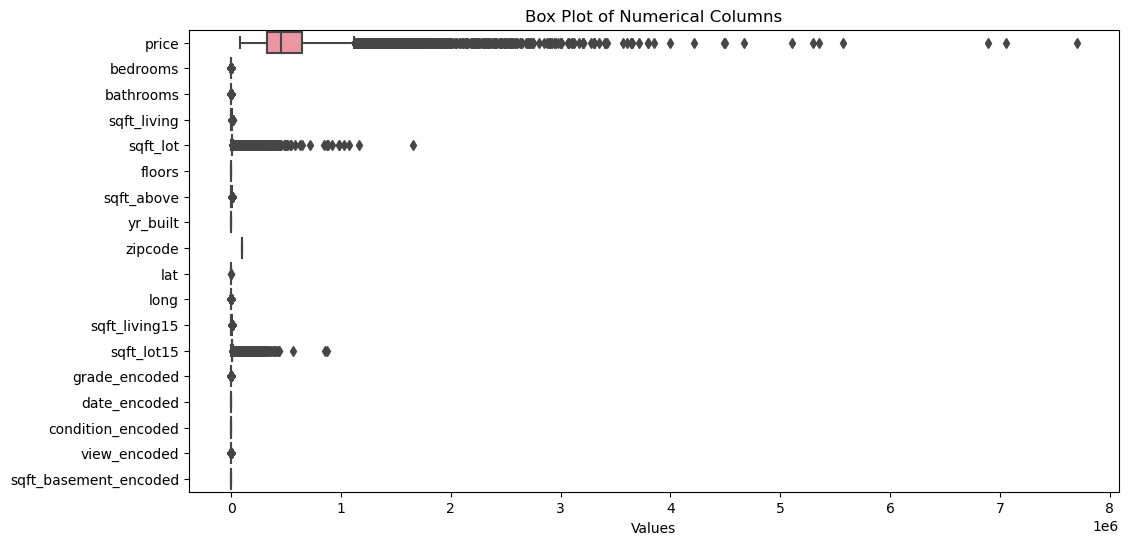

In [57]:
# Plot box plots for each numerical column in the DataFrame
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_new, orient="h")
plt.title("Box Plot of Numerical Columns")
plt.xlabel("Values")
plt.show()

In [58]:
def handle_outliers_zscore(df_new, threshold=3, replace_with=None, method='remove'):
    z_scores = np.abs((df_new - df_new.mean()) / df_new.std())  # Calculate Z-scores
    outliers_mask = z_scores > threshold  # Boolean mask for outliers
    
    if method == 'remove':
        df_new_cleaned = df_new[~outliers_mask.any(axis=1)]  # Remove rows with outliers
    elif method == 'replace' and replace_with is not None:
        df_new_cleaned = df_new.copy()  # Create a copy of the original DataFrame
        df_new_cleaned[outliers_mask] = replace_with  # Replace outliers with specified value
    else:
        raise ValueError("Invalid method or replace_with value")
    
    return df_new_cleaned

df_new_cleaned = handle_outliers_zscore(df_new, threshold=3, replace_with=None, method='remove')
df_new_cleaned




,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,grade_encoded,date_encoded,condition_encoded,view_encoded,sqft_basement_encoded
0,221900.0,3,1,1180,5650,1,1180,1955,98178,47.5112,-122.257,1340,5650,8,30,0,4,0
1,538000.0,3,2,2570,7242,2,2170,1951,98125,47.7210,-122.319,1690,7639,8,114,0,4,209
2,180000.0,2,1,770,10000,1,770,1933,98028,47.7379,-122.233,2720,8062,7,132,0,4,0
3,604000.0,4,3,1960,5000,1,1050,1965,98136,47.5208,-122.393,1360,5000,8,114,4,4,291
4,510000.0,3,2,1680,8080,1,1680,1987,98074,47.6168,-122.045,1800,7503,9,124,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530,1131,3,1530,2009,98103,47.6993,-122.346,1530,1509,9,223,0,4,0
21593,400000.0,4,2,2310,5813,2,2310,2014,98146,47.5107,-122.362,1830,7200,9,130,0,4,0
21594,402101.0,2,0,1020,1350,2,1020,2009,98144,47.5944,-122.299,1020,2007,8,265,0,4,0
21595,400000.0,3,2,1600,2388,2,1600,2004,98027,47.5345,-122.069,1410,1287,9,5,0,4,0


# Future Selection
We need to perform feature selection to reduce multicollinearity, therefore
,we can use techniques like correlation analysis and variance inflation factor (VIF).
Based on the provided correlation coefficients, we can identify potentially correlated features
and then calculate the VIF for each feature to quantify the degree of multicollinearity.
After that, we can decide which features to keep or remove. Here's how we can do it:

In [59]:

# Create new feature: Age of the house since built
current_year = 2024  # Assuming the current year
df['house_age'] = current_year - df['yr_built']

# Create new feature: Total square footage
df['total_sqft'] = df['sqft_living'] + df['sqft_lot']

# Create new feature: Price per square foot
df['price_per_sqft'] = df['price'] / df['total_sqft']

# Display the updated DataFrame with new features
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,grade_encoded,date_encoded,condition_encoded,view_encoded,sqft_basement_encoded,house_age,total_sqft,price_per_sqft
0,7129300520,10/13/2014,221900.0,3,1,1180,5650,1,NO,NONE,...,1340,5650,8,30,0,4,0,69,6830,32.489019
1,6414100192,12/9/2014,538000.0,3,2,2570,7242,2,NO,NONE,...,1690,7639,8,114,0,4,209,73,9812,54.830819
2,5631500400,2/25/2015,180000.0,2,1,770,10000,1,NO,NONE,...,2720,8062,7,132,0,4,0,91,10770,16.713092
3,2487200875,12/9/2014,604000.0,4,3,1960,5000,1,NO,NONE,...,1360,5000,8,114,4,4,291,59,6960,86.781609
4,1954400510,2/18/2015,510000.0,3,2,1680,8080,1,NO,NONE,...,1800,7503,9,124,0,4,0,37,9760,52.254098


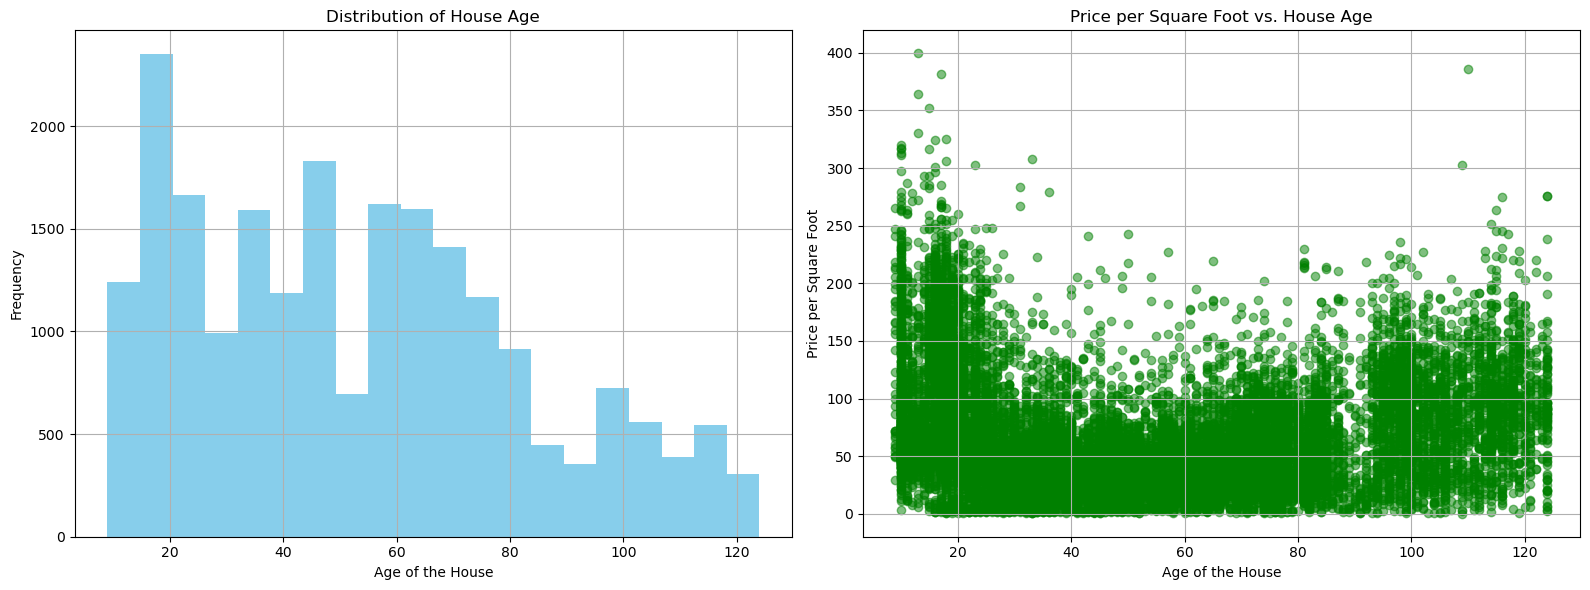

In [60]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot histogram for house age
axs[0].hist(df['house_age'], bins=20, color='skyblue')
axs[0].set_title('Distribution of House Age')
axs[0].set_xlabel('Age of the House')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Plot scatter plot for price per square foot against house age
axs[1].scatter(df['house_age'], df['price_per_sqft'], color='green', alpha=0.5)
axs[1].set_title('Price per Square Foot vs. House Age')
axs[1].set_xlabel('Age of the House')
axs[1].set_ylabel('Price per Square Foot')
axs[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()



# Correlation with target variable(Price)
We'll identify potentially correlated features by examining their correlation
coefficients with the target variable (price) and with each other.

In [61]:
#price=dependent/target variable
#checking which features are mostly correlated with price
#price is the predictor or target variable
price_correlation = df_new_cleaned.corr()["price"].sort_values(ascending=False)
price_correlation


price                    1.000000
sqft_living              0.583466
sqft_living15            0.522030
sqft_above               0.464570
lat                      0.427801
bathrooms                0.362375
grade_encoded            0.318128
bedrooms                 0.282472
floors                   0.199687
sqft_basement_encoded    0.121390
sqft_lot                 0.075524
condition_encoded        0.066100
sqft_lot15               0.062884
long                     0.022773
date_encoded             0.017022
zipcode                 -0.006541
yr_built                -0.012167
view_encoded            -0.255404
Name: price, dtype: float64

# Variance Inflation Factor
Calculating the VIF for each feature to quantify the degree of multicollinearity. 
Features with high VIF values indicate strong multicollinearity. 
The VIF data has been arranged in descending order based on the VIF values.
Here are the features sorted by their VIF values:


In [62]:
# Handling NaN values and computing VIF
def compute_vif(df):
    df = df.dropna()  # Drop rows with NaN values
    vif_df = pd.DataFrame()
    vif_df["feature"] = df.columns
    vif_df["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_df

# Compute VIF for cleaned DataFrame
vif_df_new_cleaned = compute_vif(df_new_cleaned)

# Sort by VIF in descending order
vif_df_new_cleaned_sorted = vif_df_new_cleaned.sort_values(by="VIF", ascending=False)
vif_df_new_cleaned_sorted


,feature,VIF
8,zipcode,2.082443e+06
10,long,1.735797e+06
9,lat,1.742307e+05
7,yr_built,9.580806e+03
16,view_encoded,1.167969e+02
13,grade_encoded,8.234100e+01
3,sqft_living,6.161648e+01
6,sqft_above,4.985619e+01
11,sqft_living15,3.101105e+01
1,bedrooms,2.725378e+01


# conclusions
Higher VIF values indicate stronger multicollinearity. As seen from the list, features like "zipcode", "long", and "lat" have extremely high VIF values, suggesting strong multicollinearity with other variables. 

# recommendations
It might be necessary to investigate and potentially address multicollinearity issues in the data, especially for features with high VIF values.

# Correlation of independent variables

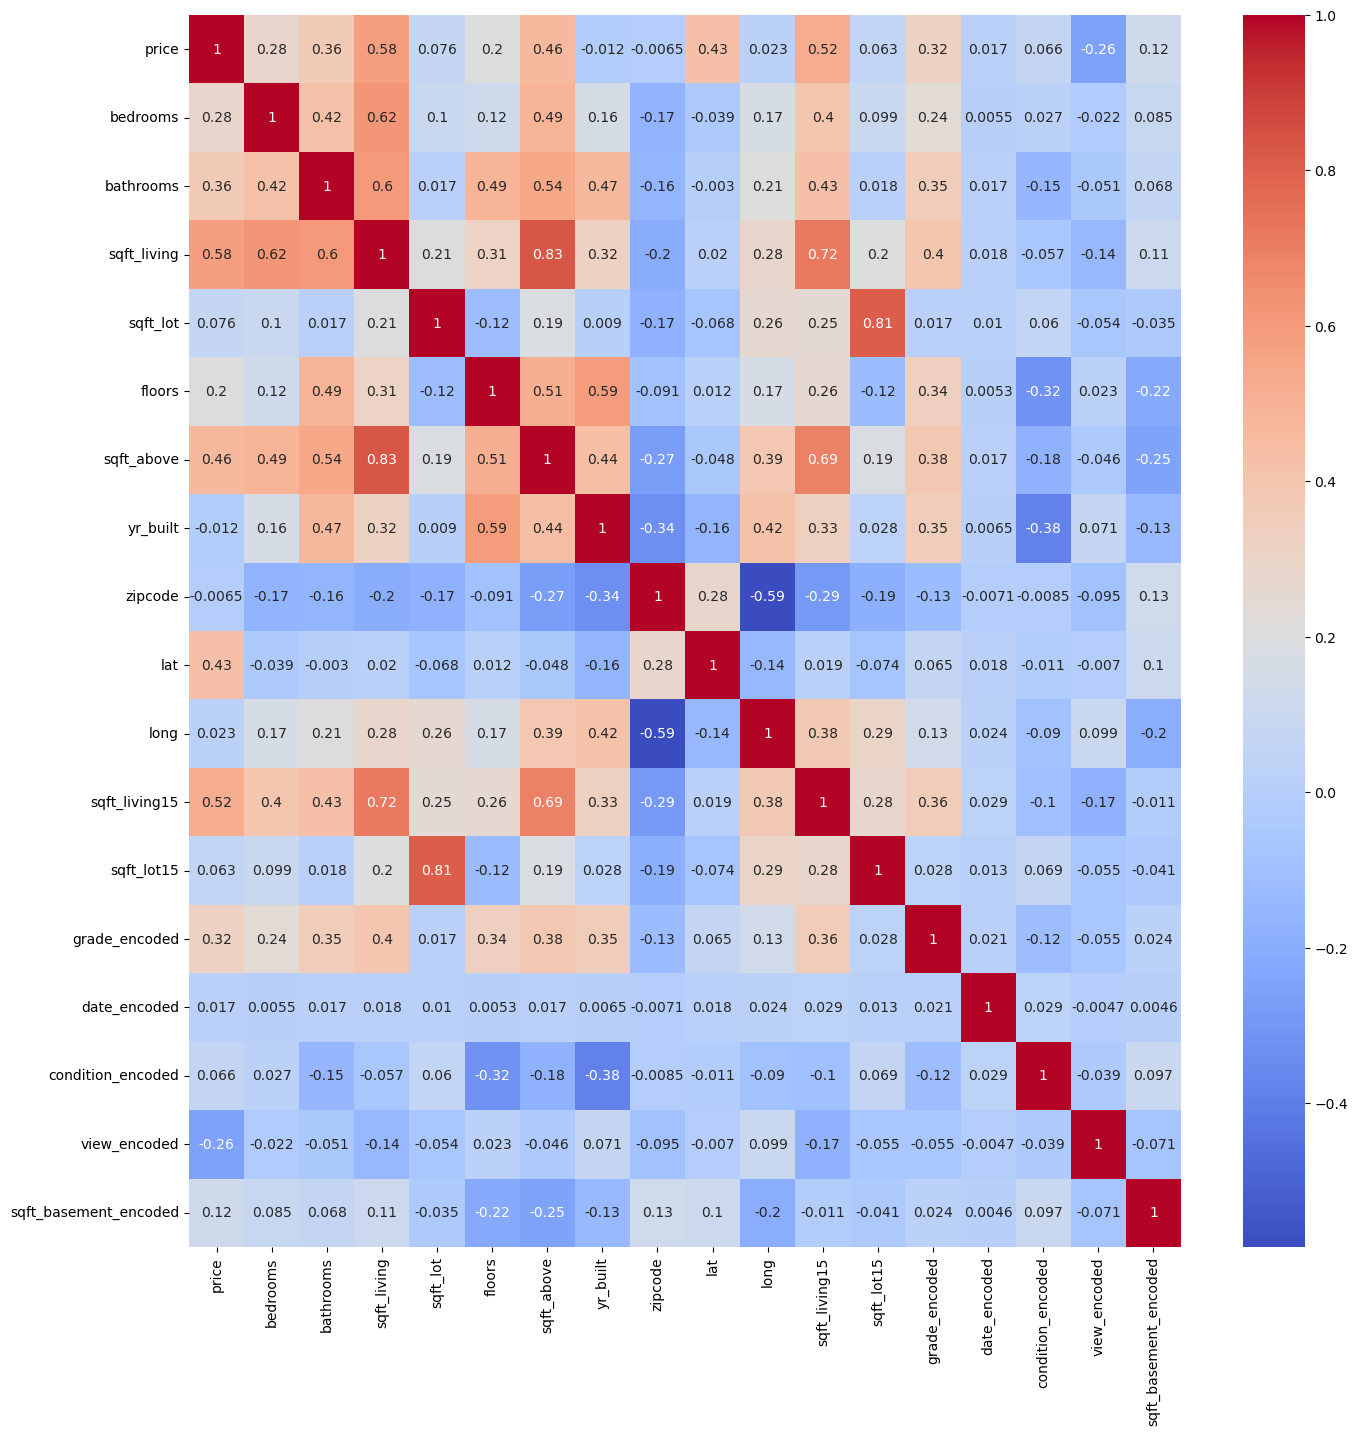

In [63]:
# Plot a heatmap to visualize correlation of features
fig, heat = plt.subplots(figsize = (16,16))
heat = sns.heatmap(df_new_cleaned.corr(), annot = True, cmap = 'coolwarm')

The resulting p_values variable will contain the p-values for each feature in the model. 
These p-values represent the probability of observing the data if the null hypothesis 
(the coefficient is equal to zero) is true. 
Lower p-values indicate more significant predictors. 
You can interpret these values to assess the significance of each feature in predicting the target variable. Features with p-values below a chosen significance level (e.g., 0.05) are typically considered statistically significant.

This will sort the p-values in descending order, allowing you to see which features have the highest p-values (i.e., least statistically significant) first.

In [64]:
# Separate the target variable (price) and predictors (features)
X = df_new_cleaned[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_above','sqft_basement_encoded','yr_built',
            'zipcode','floors','lat','long','sqft_lot','sqft_living15','condition_encoded', 'date_encoded',
            'view_encoded', 'grade_encoded']]
y = df_new_cleaned['price']

# Add a constant term to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the p-values
p_values = model.pvalues

# Sort the p-values in descending order
p_values_sorted = p_values.sort_values(ascending=False)

# Print the p-values
p_values_sorted

date_encoded              1.263137e-01
const                     5.246661e-05
sqft_lot                  1.417575e-07
sqft_basement_encoded     1.572978e-08
sqft_above                5.483675e-11
bathrooms                 4.009790e-38
long                      1.405863e-43
bedrooms                  6.463176e-46
zipcode                   3.589941e-46
grade_encoded             9.446830e-56
floors                    4.949931e-56
condition_encoded         2.267577e-57
view_encoded             3.600378e-168
sqft_living              3.676044e-184
sqft_living15            2.936263e-205
yr_built                 1.503550e-251
lat                       0.000000e+00
dtype: float64

# LINEAR REGRESSION ANALYSIS
Before performing a linear regression analysis, it's a best practice to look at a scatter plot of the independent variable vs. the dependent variable. Linear regression is only appropriate if there is a linear relationship between them. 



In statistical modeling, the goal is typically to build a model that accurately predicts the target variable (dependent variable) based on the independent variables (features). Therefore, it's generally more important for the independent variables to have a relationship with the target variable rather than with each other.
Here's why:Predictive Power: The primary purpose of build

# visualizing target and independent variables correlations
In summary, in linear regression modeling,the primary focus is on selecting independent variables
that have a strong relationship with the target variable and contribute to explaining
the variation in the target variable. While some correlation between independent variables is acceptable,
it's generally more important for the independent variables to have a relationship with the target variable
than with each other.

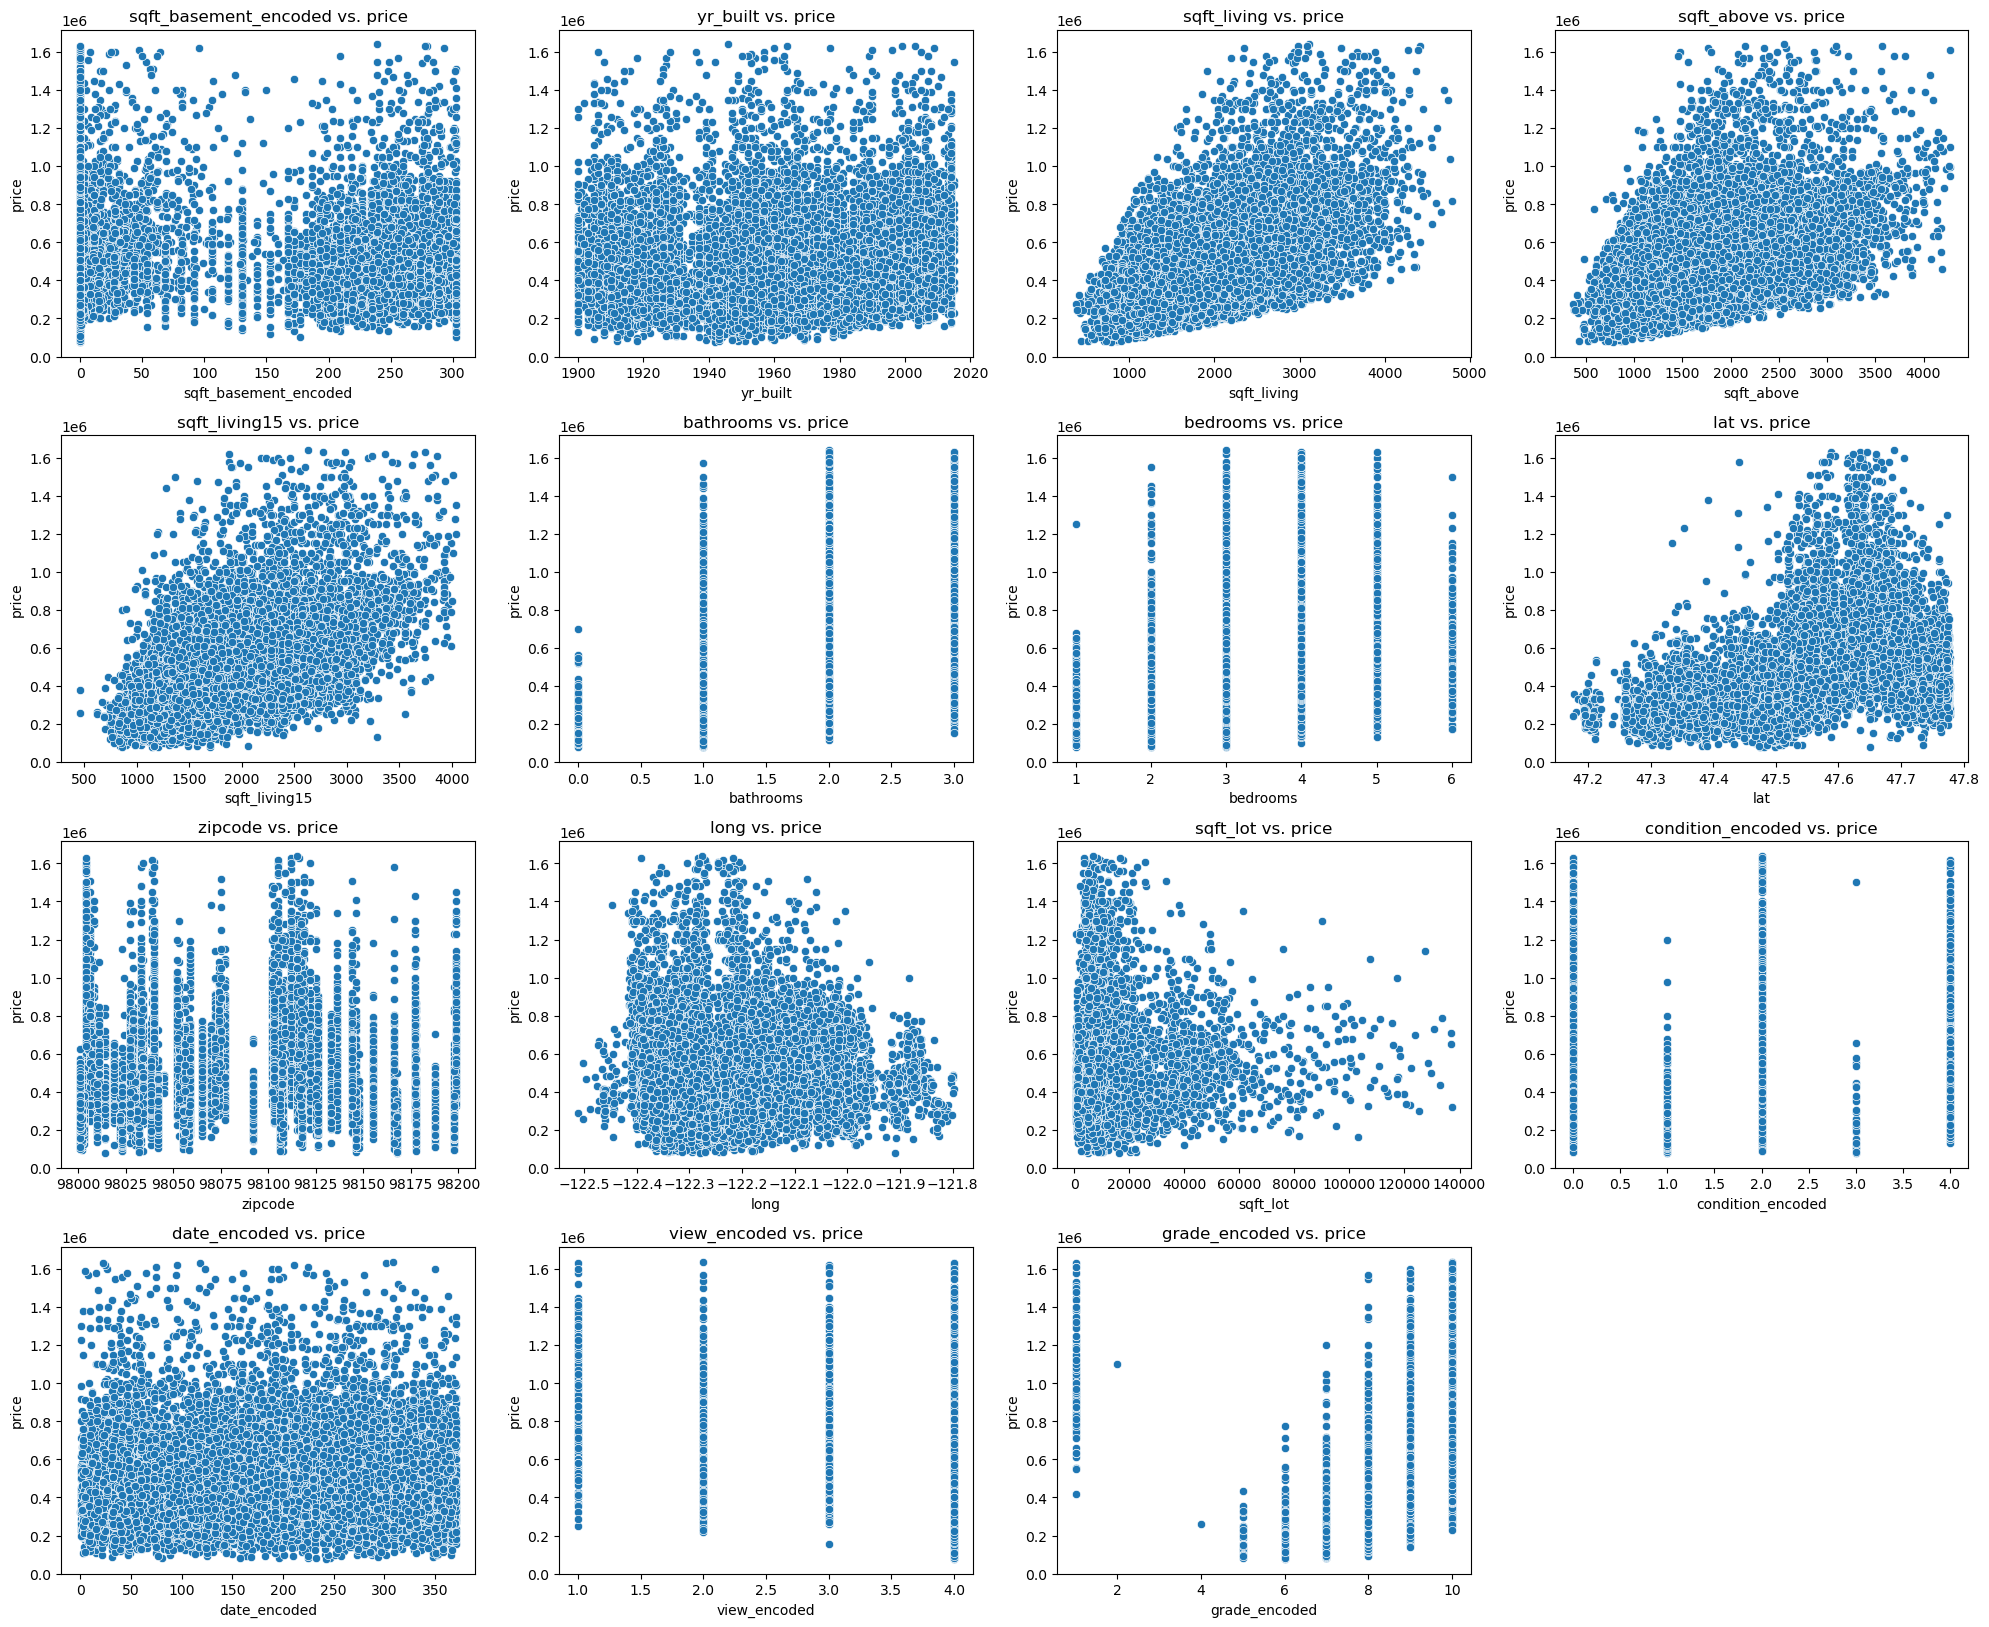

In [65]:
#plotting a scatter plot between the target variables and the independent variables
plt.figure(figsize=(20, 20))
for i, column in enumerate(['sqft_basement_encoded','yr_built',
                            'sqft_living','sqft_above','sqft_living15','bathrooms',
                            'bedrooms','lat', 
                            'zipcode','long','sqft_lot','condition_encoded', 
                            'date_encoded','view_encoded', 'grade_encoded']):
    plt.subplot(5, 4, i+1)  # Adjusted to 5x4 grid for 17 subplots
    sns.scatterplot(data=df_new_cleaned, x=column, y='price')
    plt.title(f'{column} vs. price')
plt.tight_layout()
plt.show()


# ASSUMPTIONS OF LINEAR REGRESSION

# 1.LINEARITY

With this modification, each subplot will display a scatterplot with a regression line fitted to the data.
The regression line represents the line of best fit, indicating the relationship between each independent variable 
and the target variable 'price'. Adjust the figsize and subplot parameters as needed for a better visualization.




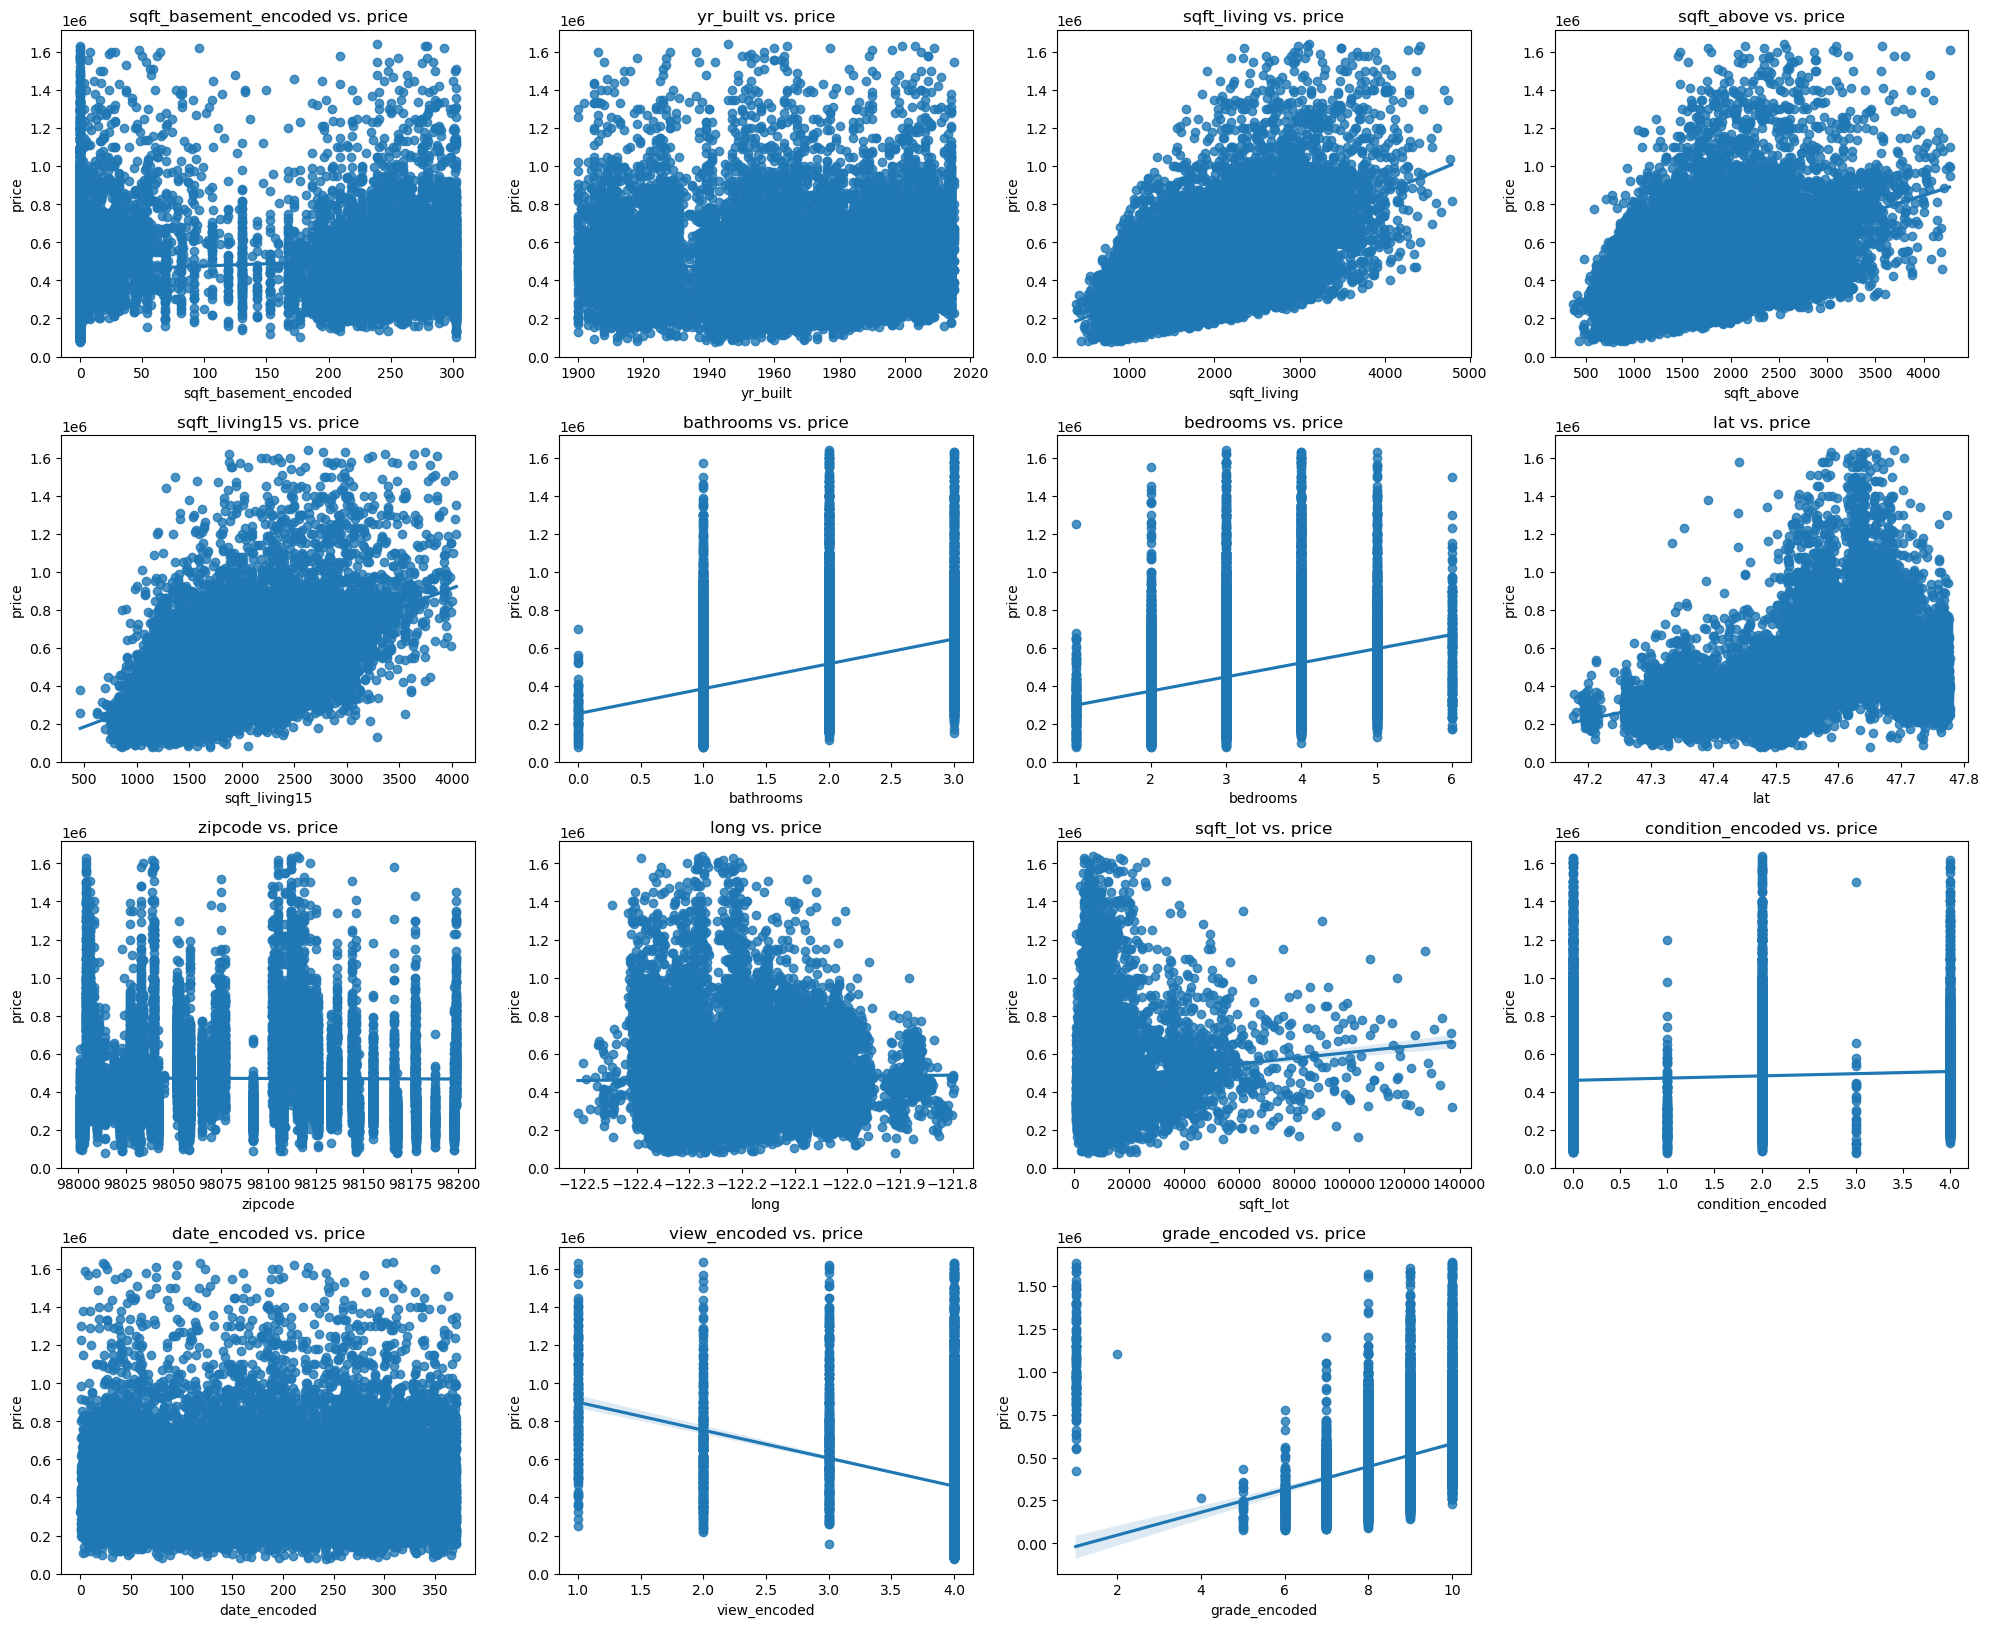

In [66]:
# Draw line of best fit to establish the linear relationship
plt.figure(figsize=(20, 20))
for i, column in enumerate(['sqft_basement_encoded','yr_built',
                            'sqft_living','sqft_above','sqft_living15','bathrooms',
                            'bedrooms','lat', 
                            'zipcode','long','sqft_lot','condition_encoded', 
                            'date_encoded','view_encoded', 'grade_encoded']):
    plt.subplot(5, 4, i+1)  # Adjusted to 5x4 grid for 17 subplots
    sns.regplot(data=df_new_cleaned, x=column, y='price')
    plt.title(f'{column} vs. price')
plt.tight_layout()
plt.show()


In [67]:
# Calculate Pearson correlation coefficients
correlation_coeffs = df_new_cleaned.corr()['price']

# Sort correlation coefficients in descending order
correlation_coeffs_sorted = correlation_coeffs.sort_values(ascending=False)

# Print correlation coefficients in descending order
print("Pearson correlation coefficients (descending order):")
print(correlation_coeffs_sorted)


Pearson correlation coefficients (descending order):
price                    1.000000
sqft_living              0.583466
sqft_living15            0.522030
sqft_above               0.464570
lat                      0.427801
bathrooms                0.362375
grade_encoded            0.318128
bedrooms                 0.282472
floors                   0.199687
sqft_basement_encoded    0.121390
sqft_lot                 0.075524
condition_encoded        0.066100
sqft_lot15               0.062884
long                     0.022773
date_encoded             0.017022
zipcode                 -0.006541
yr_built                -0.012167
view_encoded            -0.255404
Name: price, dtype: float64


# conclusions
There is a positive linear correlation relationship between price and sqft_living,sqft_above,sqft_living15,bathrooms.
There is a negative linear correlation relationship between price and grade_encoded,view encoded,zipcode.
There is a weak linear correlation relationship between price and independent variables long,condition_encoded,yr_built,sqft_basement encoded,sqft_lot15,sqft_lot,yr_renovated,floors,waterfront_encoded,lat,bedrooms.


# recommendations
Droping the independent variables since as they violate the linierity assumption.

# 2.INDEPENDENCE

To explore the independence assumption in linear regression,
we typically examine the residuals of the model.
The residuals represent the difference between the observed values of the target variable
and the values predicted by the model. The independence assumption states that 
the residuals should be independent of each other.

In the residual plot, if you observe a pattern (such as curvature, funnel shape, or any systematic trend)
or heteroscedasticity (changing spread of residuals with respect to the fitted values), 
it may indicate a violation of the independence assumption. 
Additionally, the Durbin-Watson test can provide a statistical assessment of autocorrelation in the residuals. 
If the Durbin-Watson statistic is significantly different from 2,
it suggests a violation of the independence assumption.

In [28]:
# Fit the linear regression model
X = df_new_cleaned[['sqft_basement_encoded','yr_built',
            'sqft_living','sqft_above','floors','sqft_living15','bathrooms',
            'bedrooms','lat', 
            'zipcode','long','sqft_lot','condition_encoded', 
            'date_encoded','view_encoded', 'grade_encoded']]
y = df_new_cleaned['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid

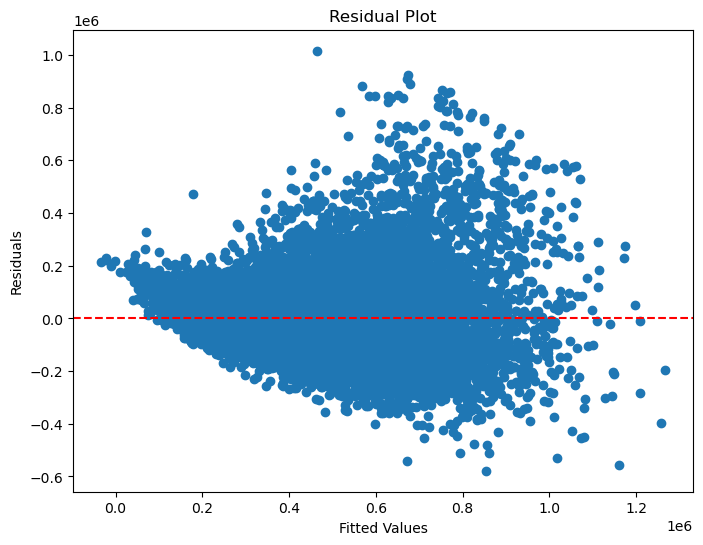

Durbin-Watson Test Statistic: 1.9784001093357602


In [68]:
# plot a Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Durbin-Watson test
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson Test Statistic:", durbin_watson_statistic)


# Conclusions
The above test statistic of approximately 1.99 indicates that there is very little evidence of autocorrelation in the residuals. This suggests that the independence assumption in linear regression may be reasonable for the model.
Therefore Providing evidence that the independence assumption in linear regression is not violated, 
indicating that the model's residuals exhibit no significant autocorrelation pattern.

# 3.Homoscedasticity

To explore the assumption of homoscedasticity (constant variance of residuals) in linear regression,
you can create a plot of the residuals against the predicted values. 
The plot should show no clear pattern or trend in the spread of residuals as the predicted values change.


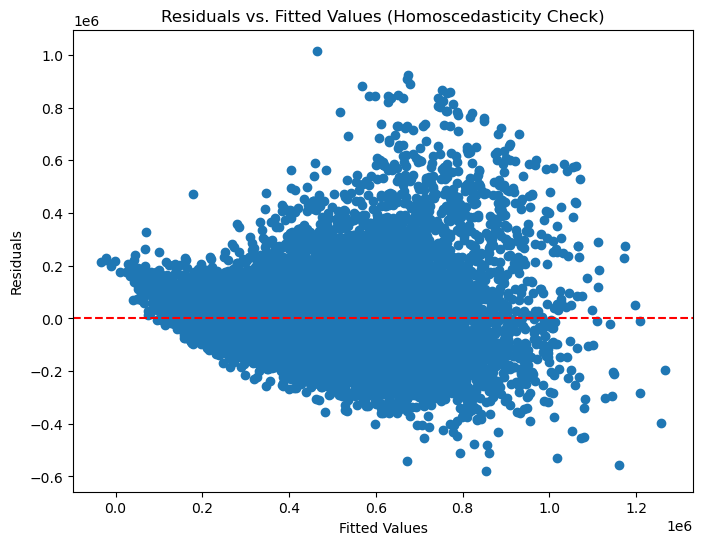

In [69]:
# Plot residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (Homoscedasticity Check)')
plt.show()


# conclusion
The observed pattern is a Cone_Shaped or the spread of residuals increases 
or decreases systematically as the predicted values change.This indicates heteroscedasticity, violating the assumption of constant variance homoscedasticity

# 4. Normality

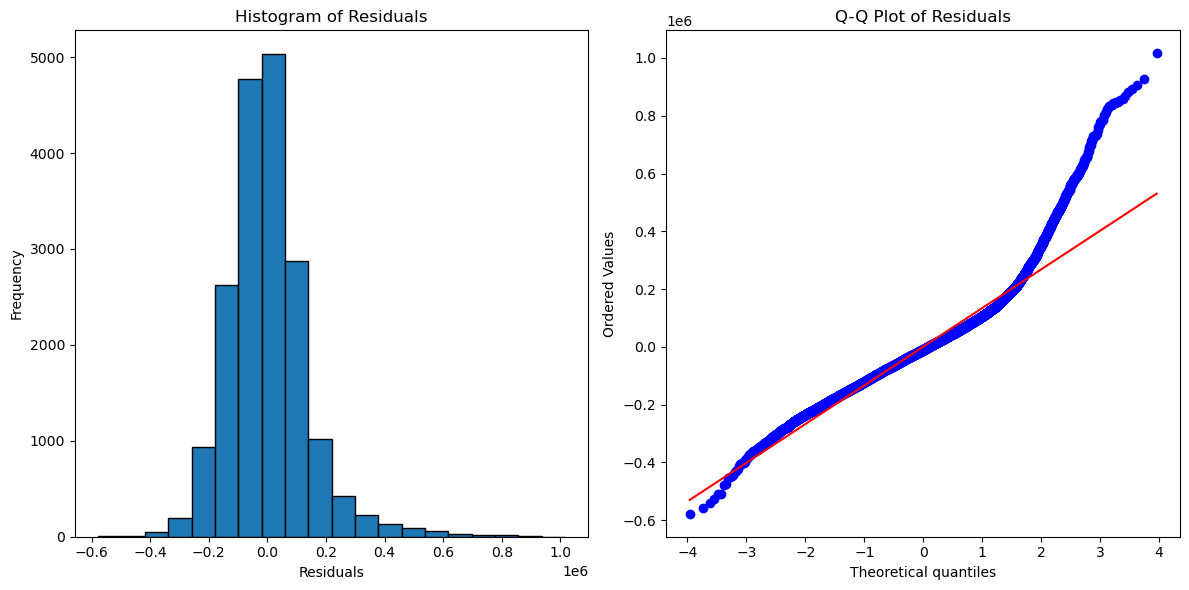

In [70]:
# Create subplots for histogram and Q-Q plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram of residuals
axes[0].hist(residuals, bins=20, edgecolor='black')
axes[0].set(title='Histogram of Residuals', xlabel='Residuals', ylabel='Frequency')

# Q-Q plot of residuals
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()


# conclusion
Histogram has a normal Distribution and has a Right-tail.The Q-Qplot is also not heavily skewed.

# conclusion
Each row represents a data point in the df_new dataset.
Each column represents a feature.
If a value in a particular column is True, it means that the corresponding data point is considered an outlier for that feature.
If a value in a particular column is False, it means that the corresponding data point is not considered an outlier for that feature.

Zipcode and sqft_lot rows have outliers.

# Recommendation
Apply log transformation, the selected features will have a more normalized distribution, which can help mitigate the impact of outliers and improve the performance of certain statistical analyses or machine learning models.

# MODELLING AND MODEL EVALUATION

# 1. Base model: Simple Linear Regression Model

In [71]:
# Define the formula for the simple linear regression model
simple_formula = 'price ~ sqft_living'

# Fit the linear regression model
simple_model = smf.ols(formula=simple_formula, data=df_new_cleaned).fit()

# Generate and display the summary of the linear regression model
simple_model_summary = simple_model.summary()

print(simple_model_summary)



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     9559.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:20:00   Log-Likelihood:            -2.5062e+05
No. Observations:               18521   AIC:                         5.013e+05
Df Residuals:                   18519   BIC:                         5.013e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.158e+05   3866.483     29.941      

# Conclusions
# R-squared: 
The coefficient of determination (R-squared) measures the proportion of the variance in the dependent variable (price) that is explained by the independent variable (sqft_living). In this model, the R-squared value is 0.340, indicating that approximately 34% of the variability in house prices can be explained by the square footage of living space.

# Coefficients:
The coefficient for the intercept term is approximately 115,800, indicating the estimated average house price when the square footage of living space is zero (which is not practically meaningful). The coefficient for the sqft_living variable is approximately 186.45, indicating that, on average, each additional square foot of living space is associated with an increase in house price of approximately $186.45.

# Standard Errors and t-values:
Standard errors estimate the variability of the coefficient estimates. The t-values indicate the significance of each coefficient. Both the intercept and sqft_living coefficients have very low p-values (p < 0.001), indicating that they are statistically significant predictors of house price.

# Model Fit Statistics:
The F-statistic tests the overall significance of the model. In this case, the F-statistic is very high (9559) with a corresponding p-value close to zero, indicating that the model as a whole is statistically significant. The AIC and BIC are measures of model fit, with lower values indicating better fit.

# Assumptions and Diagnostics:
The summary also provides additional information such as the Omnibus test, Durbin-Watson statistic, and Jarque-Bera test, which are used to assess model assumptions and diagnostics. These tests evaluate aspects like normality of residuals, autocorrelation, and heteroscedasticity.










# Recommendations
This summary provides valuable insights into the relationship between house prices and square footage of living space, as well as the overall fit and significance of the SLR model. However, as mentioned earlier, the large condition number (5.85e+03) suggests potential issues related to multicollinearity, which should be further investigated and addressed if necessary. 

Further diagnostic checks and potentially model refinement may be warranted to address these issues.

We can do that by Multiple linear regression model.

# 2. Multiple Linear Regression Model

In [72]:
# Define the formula for the multiple regression model
multiple_formula = 'price ~ sqft_living + sqft_basement_encoded +floors + yr_built + sqft_above + sqft_living15 + bathrooms + bedrooms + lat  + zipcode + long + sqft_lot + condition_encoded + date_encoded + view_encoded + grade_encoded'

# Fit the multiple regression model
multiple_model = ols(multiple_formula, df_new_cleaned).fit()

# Generate and display the summary of the multiple regression model
multiple_model_summary = multiple_model.summary()

# Print the summary
print(multiple_model_summary)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     1874.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:20:06   Log-Likelihood:            -2.4556e+05
No. Observations:               18521   AIC:                         4.911e+05
Df Residuals:                   18504   BIC:                         4.913e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -8.83e+

# Conclusions

# R-squared: 
The coefficient of determination (R-squared) measures the proportion of the variance in the dependent variable (price) that is explained by the independent variables (features). In this model, the R-squared value is 0.618, indicating that approximately 61.8% of the variability in house prices can be explained by the independent variables included in the model.

# Coefficients: 
The coefficients represent the estimated effect of each independent variable on the dependent variable, holding other variables constant. For example, the coefficient for sqft_living is approximately 113.28, indicating that a one-unit increase in square footage of living space is associated with an increase in house price of approximately $113.28, holding other variables constant.

# Standard Errors and t-values:
Standard errors estimate the variability of the coefficient estimates. The t-values indicate the significance of each coefficient. The p-values associated with each coefficient test the null hypothesis that the coefficient is equal to zero. In this case, most coefficients have very low p-values (p < 0.001), indicating that they are statistically significant predictors of house price.

# Model Fit Statistics:
The F-statistic tests the overall significance of the model. In this case, the F-statistic is high (1874) with a corresponding p-value close to zero, indicating that the model as a whole is statistically significant. The AIC and BIC are measures of model fit, with lower values indicating better fit.

Assumptions and Diagnostics: 
The summary also provides additional information such as the Omnibus test, Durbin-Watson statistic, and Jarque-Bera test, which are used to assess model assumptions and diagnostics. These tests evaluate aspects like normality of residuals, autocorrelation, and heteroscedasticity.

# Recommendation
Overall, this summary provides valuable insights into the relationship between house prices and the various independent variables included in the MLR model, as well as the overall fit and significance of the model. However, as noted in the summary, the large condition number (2.11e+08) suggests potential issues related to multicollinearity or other numerical stability problems, which should be further investigated and addressed if necessary.

We will explore Random forest Model to address this issues to improve our model performance.

# 3. Random Forest Regression Model

In [73]:
# Random Forest Regression model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the performance metrics of the Random Forest Regression model
print("\nRandom Forest Regression Model Performance:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)


Random Forest Regression Model Performance:
Mean Squared Error: 7893185057.64773
R-squared: 0.8464551470269737


# CONCLUSIONS
# Mean Squared Error (MSE): 
The MSE is a measure of the average squared difference between the actual and predicted values. In this case, the MSE is approximately 7.89 billion. Lower MSE values indicate better fit, meaning that the model's predictions are closer to the actual values on average.
 
# R-squared:
is a measure of how well the independent variables explain the variability of the dependent variable. It ranges from 0 to 1, where 1 indicates perfect predictions. In this case, the R-squared value is approximately 0.847, which means that around 84.7% of the variance in the dependent variable (target) is explained by the independent variables (features) in the model.
This is a relatively good R-squared value, indicating that the model fits the data well.

Overall,  Random Forest Regression model seems to perform reasonably well based on these evaluation metrics.These performance metrics suggest that the Random Forest Regression model performs relatively well in predicting house prices based on the given features. The high R-squared value indicates that the model captures a significant portion of the variability in house prices, while the relatively low MSE suggests that the model's predictions are generally close to the actual values. 

In [35]:
# Print the performance metrics
print("Feature Importances:")
for feature, importance in zip(X.columns, rf_regressor.feature_importances_):
    print(feature, ":", importance)

Feature Importances:
const : 0.0
sqft_basement_encoded : 0.006144952050984672
yr_built : 0.023232862717104584
sqft_living : 0.31367765444026474
sqft_above : 0.01989861556887554
floors : 0.0018163744143747836
sqft_living15 : 0.05403257694698735
bathrooms : 0.002690965110153813
bedrooms : 0.004657935175461475
lat : 0.3982208601172771
zipcode : 0.0178881681456547
long : 0.06209371078067183
sqft_lot : 0.022600115650176562
condition_encoded : 0.005111194163252143
date_encoded : 0.013760088148822278
view_encoded : 0.02290107105410668
grade_encoded : 0.03127285551583177


# RECOMMENDATION

These feature importances provide insights into which features are most influential 
in predicting house prices according to the Random Forest Regression model.
Features with higher importances are more crucial in making accurate predictions.
They include:

# sqft_living: 
This feature has the highest importance with a value of approximately 0.314. 
It suggests that the square footage of living space is the most influential
feature in predicting house prices.

# lat:
The latitude of the location comes next in importance, with a value of approximately 0.398. 
This indicates that the geographical location, represented by latitude,
plays a significant role in determining house prices.

# long: 
The longitude of the location follows, with a value of approximately 0.062.
Longitude is also an important geographical feature in predicting house prices.

# sqft_living15:
This feature represents the average square footage of interior housing living space 
for the nearest 15 neighbors. Its importance is approximately 0.054.

# grade_encoded: 
The encoded grade of the house has an importance value of approximately 0.031.

# sqft_lot:
The square footage of the land lot has an importance value of approximately 0.023.

# yr_built:
The year the house was built has an importance value of approximately 0.023.

# zipcode:
The zip code of the location has an importance value of approximately 0.018.

# sqft_above: 
The square footage of interior housing living space above ground level has an
importance value of approximately 0.020.

# date_encoded:
The encoded date of the sale has an importance value of approximately 0.014.

# sqft_basement_encoded: 
The encoded indicator of whether the house has a basement has an importance value of approximately 0.006.
condition_encoded, bedrooms, bathrooms, view_encoded, floors: 
These features have relatively lower importance values ranging from approximately 0.001 to 0.006.
